## LIGHTHOUSE INDICIUM - Desafio Cientista de Dados

**Realizado por:** Artur Stein Carmo

### Desafio

Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).

### Entregas

1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas. Seja criativo!
2. Responda também às seguintes perguntas:
- Qual filme você recomendaria para uma pessoa que você não conhece?
    
    R: Baseado na análise do conjunto de dados, o filme "Dark Knight" possui a maior nota no IMDB e uma das mais altas avaliações pelos usuários, sendo uma boa recomendação para alguém que não 
    tem informações específicas sobre preferências.

- Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

    R: Com base na análise das correlações das variáveis numéricas, observa-se uma forte correlação entre o número de votos e a bilheteria de um filme, indicando que filmes com maior público tendem a receber mais votos. Em relação às variáveis categóricas, através do projeto e do tratamento dos dados, verifica-se que tanto os atores quanto os diretores possuem uma correlação significativa com a receita do filme.
- Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

    R: Na coluna "overview", é possível extrair os seguintes insights: se o filme é uma continuação de uma série, seu gênero e tema. É viável inferir o gênero do filme através de uma análise de sentimento do texto, combinada com um modelo de classificação utilizando os dados obtidos dessa análise.

3. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

    R: Para realizar uma previsão da nota do IMDB a partir dos dados, é crucial primeiro se familiarizar com os dados, entender seus valores e significados, para então proceder com o tratamento e a aplicação do modelo sequencialmente. 

    Neste projeto, foram realizadas diversas transformações nas variáveis, resultando na seguinte estrutura:


    | Coluna           | Descrição                                   | Alterações                                                                 |
    |------------------|---------------------------------------------|-----------------------------------------------------------------------------|
    | Runtime          | Duração do Filme                            | Mudança na tipagem da coluna, removendo "min"                                |
    | IMDB_Rating      | Nota do Filme pelo IMDB                     | Nenhuma alteração                                                           |
    | Certificate      | Grupo de classificação indicativa           | Separação em 3 categorias de "público mais amplo" a "público mais restrito" |
    | Released_Year    | Ano de Lançamento do filme                  | Mudança na tipagem da coluna                                                |
    | No_of_Votes      | Número de votos                             | Nenhuma alteração                                                           |
    | Meta_score       | Nota do filme pelo Público                  | Nenhuma alteração                                                           |
    | Gross_Log        | Logaritmo da arrecadação da bilheteria      | Transformação logarítmica do Gross para evitar multicolinearidade            |
    | Dummies de Gênero| Colunas Dummy de gênero dos filmes          | Seleção do primeiro gênero citado e criação de variáveis dummy para classificação |
    | Class_Cast   | Classificação do elenco (Atores e diretores)| Agregação das médias das notas dos diretores e atores em grupos              |


    Estamos lidando com um problema de regressão, utilizando o RandomForestRegressor, que demonstrou os melhores resultados. Este modelo é valorizado por sua precisão em lidar com dados não lineares e robustez contra outliers. No entanto, pode ser mais lento e menos interpretável que modelos lineares simples, exigindo ajuste cuidadoso de hiperparâmetros para otimização. Escolhemos utilizar as métricas de desempenho MAE (Erro Médio Absoluto), MSE (Erro Quadrático Médio) e R² (coeficiente de determinação), que fornecem uma avaliação abrangente da precisão e capacidade explicativa do modelo.

4. Supondo um filme com as seguintes características:

    {'Series_Title': 'The Shawshank Redemption',
     'Released_Year': '1994',
     'Certificate': 'A',
     'Runtime': '142 min',
     'Genre': 'Drama',
     'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
     'Meta_score': 80.0,
     'Director': 'Frank Darabont',
     'Star1': 'Tim Robbins',
     'Star2': 'Morgan Freeman',
     'Star3': 'Bob Gunton',
     'Star4': 'William Sadler',
     'No_of_Votes': 2343110,
     'Gross': '28,341,469'}

    Qual seria a nota do IMDB?

    R: Com o modelo elaborado do RamdomForestRegressor, a nota obtida foi 8,84. Uma diferença de 0,46 da nota real (9.3).

5. Salve o modelo desenvolvido no formato .pkl. 


### Importação das bibliotecas

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import joblib

### Entrada dos Dados

In [133]:
raw_df = pd.read_csv('desafio_indicium_imdb.csv')

O conjunto de dados possui uma coluna sem nome (Unnamed: 0), que parece ser o índice dos filmes. Como o DataFrame já possui índices, essa coluna será removida.

In [134]:
raw_df = raw_df.drop('Unnamed: 0', axis=1)

In [135]:
raw_df.shape

(999, 15)

In [136]:
raw_df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [137]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB


### Tratamentos inicias no DataFrame

Transformando as colunas numéricas que estão como objetos no DataFrame e removendo a string "min" da duração dos filmes.

In [138]:
raw_df["Runtime"] = raw_df["Runtime"].str.replace("min","")
raw_df["Runtime"] = raw_df["Runtime"].str.strip()
raw_df["Runtime"] = raw_df["Runtime"].astype(int)
raw_df["Released_Year"] = raw_df["Released_Year"].replace("PG",np.nan)
raw_df["Released_Year"] = raw_df["Released_Year"].astype(float) 
raw_df["Gross"] = raw_df["Gross"].str.replace(",","").astype(float)

In [139]:
raw_df['Released_Year'] = pd.to_numeric(raw_df['Released_Year'], errors='coerce')
raw_df['Runtime'] = pd.to_numeric(raw_df['Runtime'], errors='coerce')
raw_df['Gross'] = pd.to_numeric(raw_df['Gross'], errors='coerce')

In [140]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  998 non-null    float64
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    int32  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    float64
dtypes: float64(4), int32(1), int64(1), object(9)
memory usage: 113.3+ KB


In [141]:
raw_df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003.0,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


In [142]:
raw_df.isnull().sum()

Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

O tratamento dos valores nulos ocorrerá durante o projeto.

In [143]:
raw_df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,998.000000,999.000000,999.000000,842.000000,9.990000e+02,8.300000e+02
mean,1991.214429,122.871872,7.947948,77.969121,2.716214e+05,6.808257e+07
std,23.308539,28.101227,0.272290,12.383257,3.209126e+05,1.098076e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,70.000000,5.547150e+04,3.245338e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,2009.000000,137.000000,8.100000,87.000000,3.731675e+05,8.087634e+07
max,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


In [144]:
raw_df["Certificate"].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

Os valores "U", "U/A", "A" e "S" correspondem à certificação fornecida pelo Central Board of Film Certification do governo indiano. Além disso, os valores "G", "PG" e "R" são da Motion Picture Association dos Estados Unidos, a mais amplamente reconhecida globalmente. Por fim, o valor "TV-PG" corresponde à Federal Communications Commission dos Estados Unidos e se aplica ao conteúdo transmitido na TV.

Com base no exposto, tomarei duas ações: primeiro, converterei todos os valores para uma única escala (a da MPAA), e em segundo lugar, lidarei com aqueles valores que não se encaixam em nenhuma das escalas mencionadas.

| CBFC | MPAA Filmes | MPAA TV | Descrição |
| --- | --- | --- | --- |
| U | G, PG | TV-Y, TV-Y7, TV-G, TV-PG | Exibição pública irrestrita, adequada para todas as idades |
| U/A | PG-13 | TV-14 | Exibição pública irrestrita, mas com recomendação de orientação dos pais para menores de 12 anos |
| A | R, NC-17 | TV-MA | Somente adultos podem ver esses programas |

In [145]:
raw_df["Certificate"] = raw_df["Certificate"].str.replace("/","").replace("GP","PG")

mapping = {"A":"R","UA":"PG-13","U":"G", "TV-PG":"G", "TV-14":"PG-13", "TV-MA":"R"}

raw_df = raw_df.replace({"Certificate":mapping})

raw_df[~raw_df["Certificate"].isin(["G","PG","PG-13","R"])]["Certificate"].unique()

array([nan, 'Passed', '16', 'Unrated', 'Approved'], dtype=object)

Assumi que "Passed" ou "Approved" significa que eles têm a certificação mais adequada para todos os públicos (G).

In [146]:
raw_df = raw_df.replace({"Certificate":{"Passed":"G", "Approved":"G"}})

raw_df["Certificate"].unique()

array(['R', 'PG-13', 'G', nan, 'PG', '16', 'Unrated'], dtype=object)

In [147]:
raw_df["Certificate"] = raw_df["Certificate"].replace("16", np.nan).replace("Unrated",np.nan)

In [148]:
raw_df["Certificate"].unique()

array(['R', 'PG-13', 'G', nan, 'PG'], dtype=object)

Codificando as categorias em valores numéricos. Essas categorias são ordinais, pois vão do "público mais amplo" ao "público mais restrito".

In [149]:
raw_df = raw_df.replace({"Certificate":{
    "G":1,
    "PG":1,
    "PG-13":2,
    "R":3
}})

C:\Users\artur\AppData\Local\Temp\ipykernel_1732\1797874426.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_df = raw_df.replace({"Certificate":{


### EDA - Análise Explorátoria dos Dados

C:\Users\artur\AppData\Local\Temp\ipykernel_1732\641740583.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['No_of_Votes'][:7], palette = 'Set2')


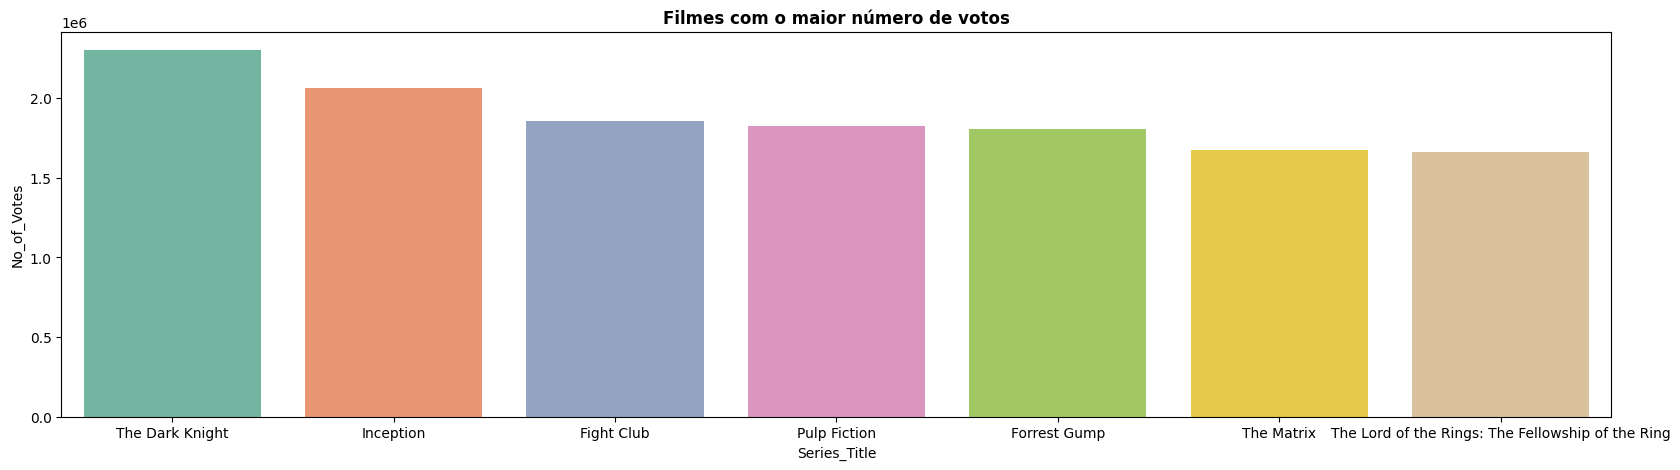

In [150]:
top_voted = raw_df.sort_values(['No_of_Votes'], ascending = False)
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['No_of_Votes'][:7], palette = 'Set2')
g.set_title("Filmes com o maior número de votos", weight = "bold")
plt.show()

C:\Users\artur\AppData\Local\Temp\ipykernel_1732\443302617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['IMDB_Rating'][:7], palette = 'Set2')


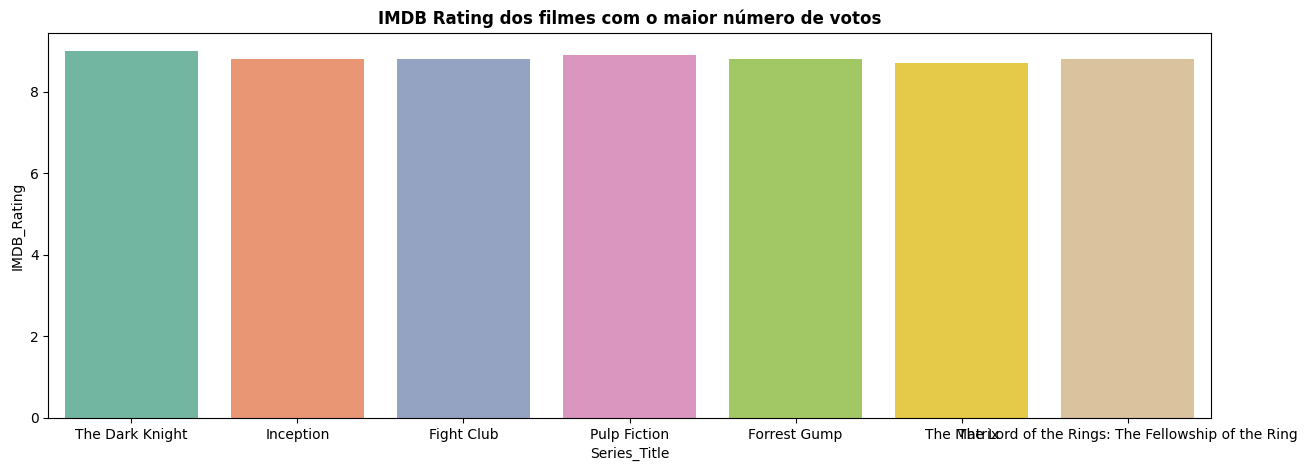

In [151]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['IMDB_Rating'][:7], palette = 'Set2')
g.set_title("IMDB Rating dos filmes com o maior número de votos", weight = "bold")
plt.show()

C:\Users\artur\AppData\Local\Temp\ipykernel_1732\449533342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['Meta_score'][:7], palette = 'Set2')


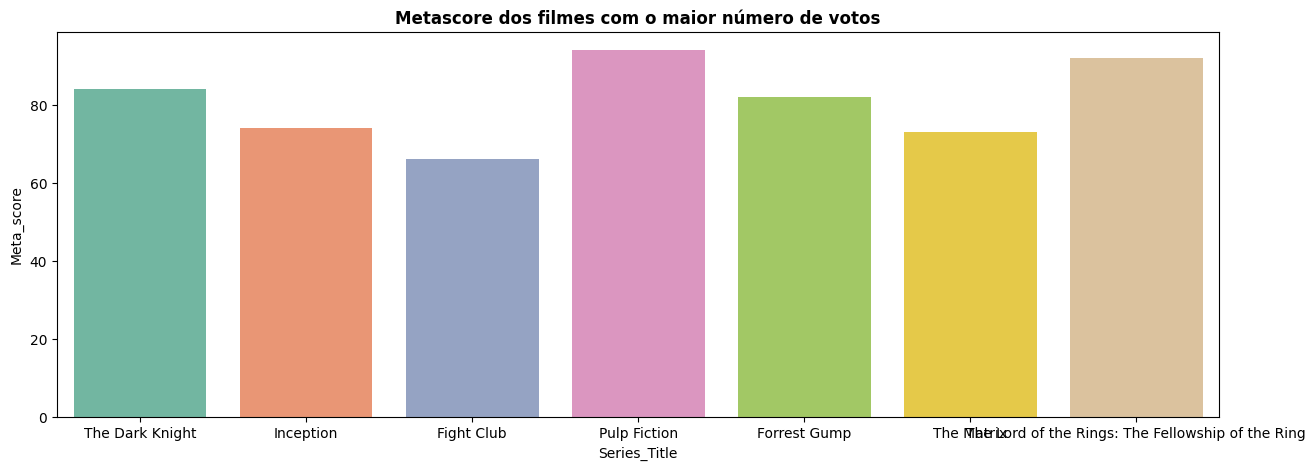

In [152]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['Meta_score'][:7], palette = 'Set2')
g.set_title("Metascore dos filmes com o maior número de votos", weight = "bold")
plt.show()

C:\Users\artur\AppData\Local\Temp\ipykernel_1732\551401949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x=highest_earning['Series_Title'][:7],y=highest_earning['Gross'][:7], palette = 'Set2')


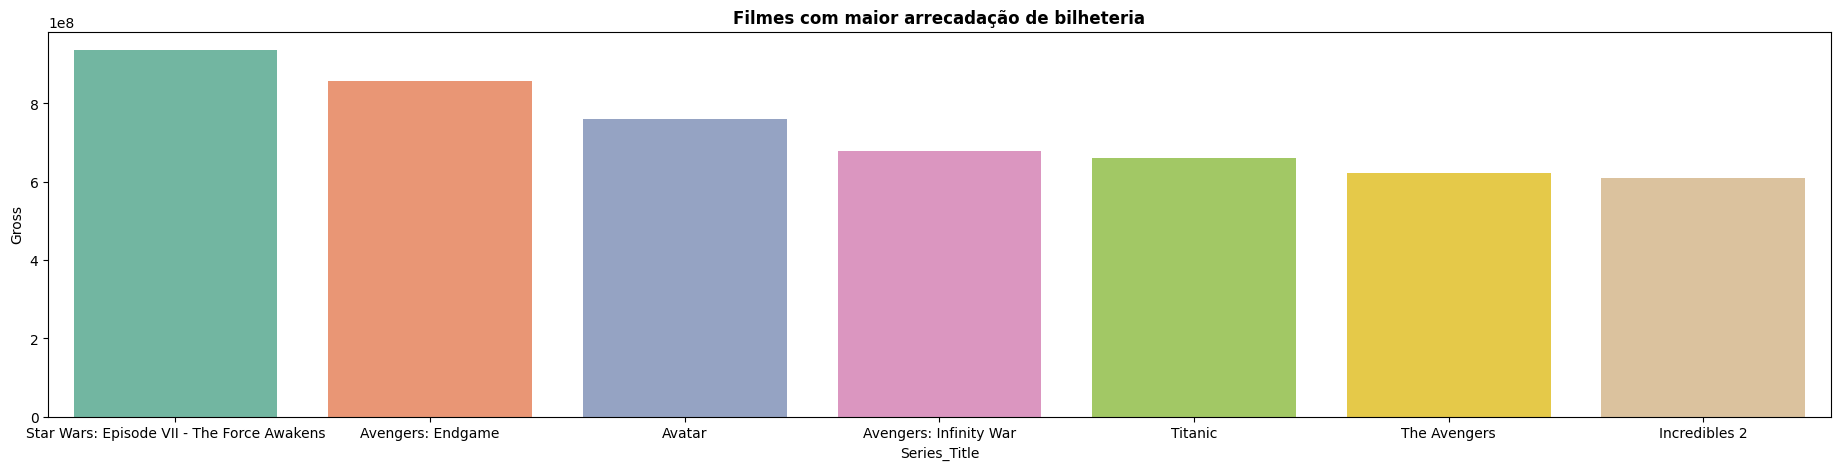

In [153]:
highest_earning = raw_df.sort_values(['Gross'], ascending = False)
fig,axs=plt.subplots(figsize=(23,5))
g=sns.barplot(x=highest_earning['Series_Title'][:7],y=highest_earning['Gross'][:7], palette = 'Set2')
g.set_title("Filmes com maior arrecadação de bilheteria", weight = "bold")
plt.show()

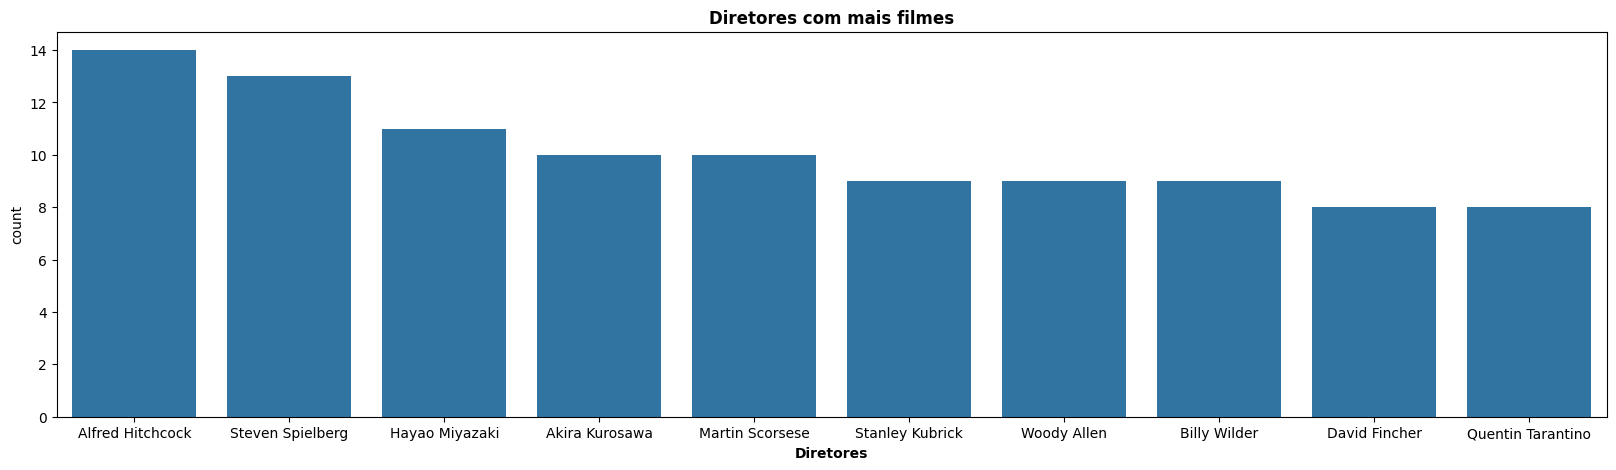

In [154]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=raw_df['Director'].value_counts()[:10].index,y=raw_df['Director'].value_counts()[:10])
g.set_title("Diretores com mais filmes", weight = "bold")
g.set_xlabel("Diretores", weight = "bold")
plt.show()

Stars com maior aparições em filmes:

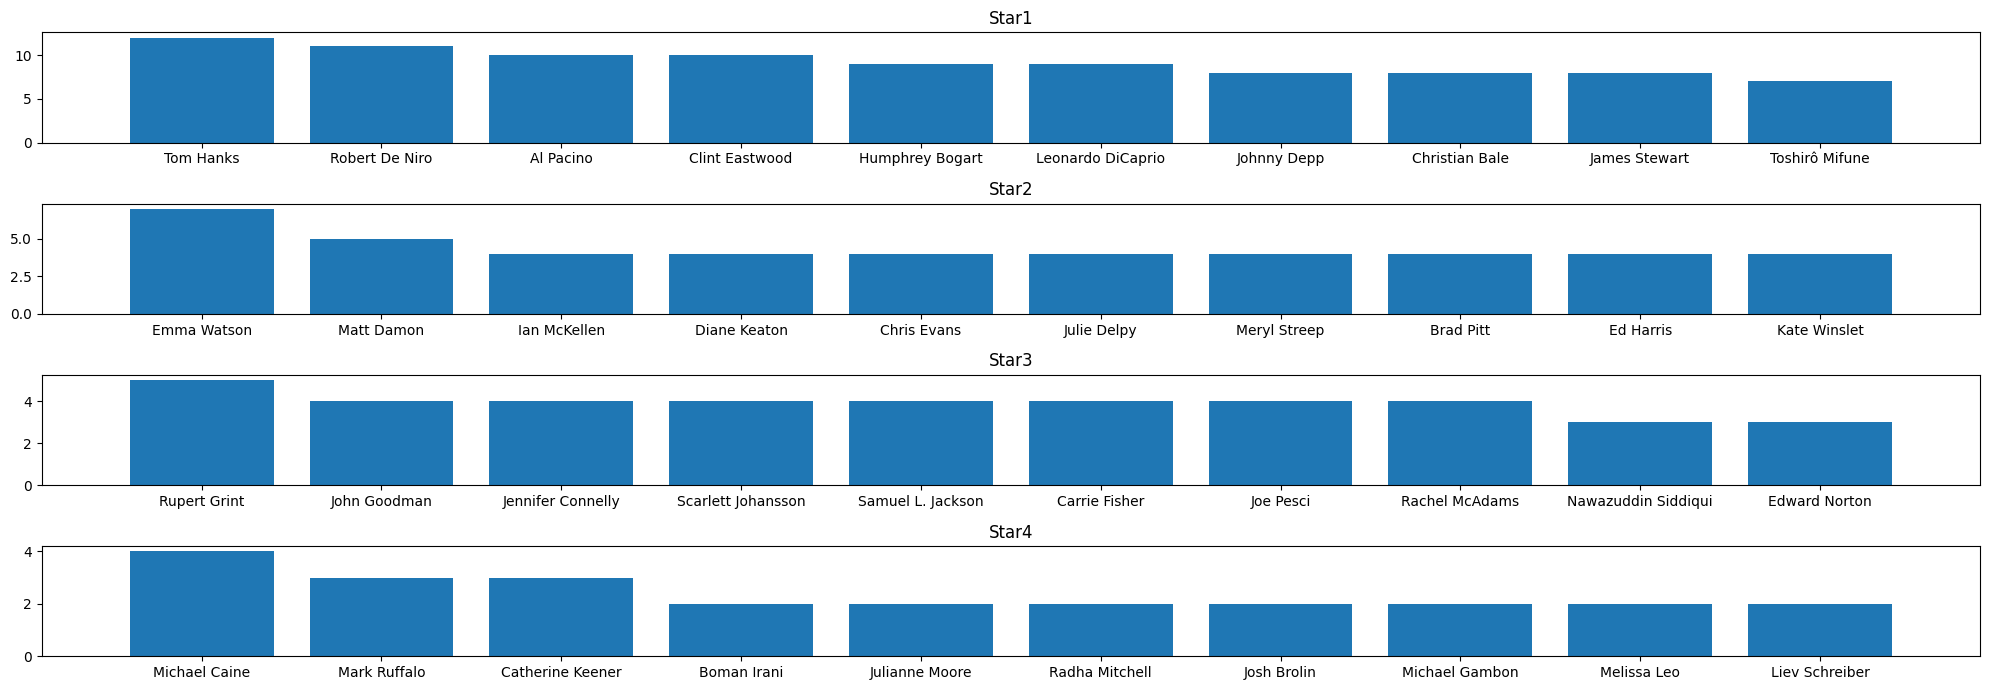

In [155]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    axs[ax].bar(raw_df[x].value_counts()[:10].index,raw_df[x].value_counts()[:10])
    axs[ax].set_title(x)
    ax+=1
    plt.tight_layout()

Stars com maior aparições em filmes mais votados:

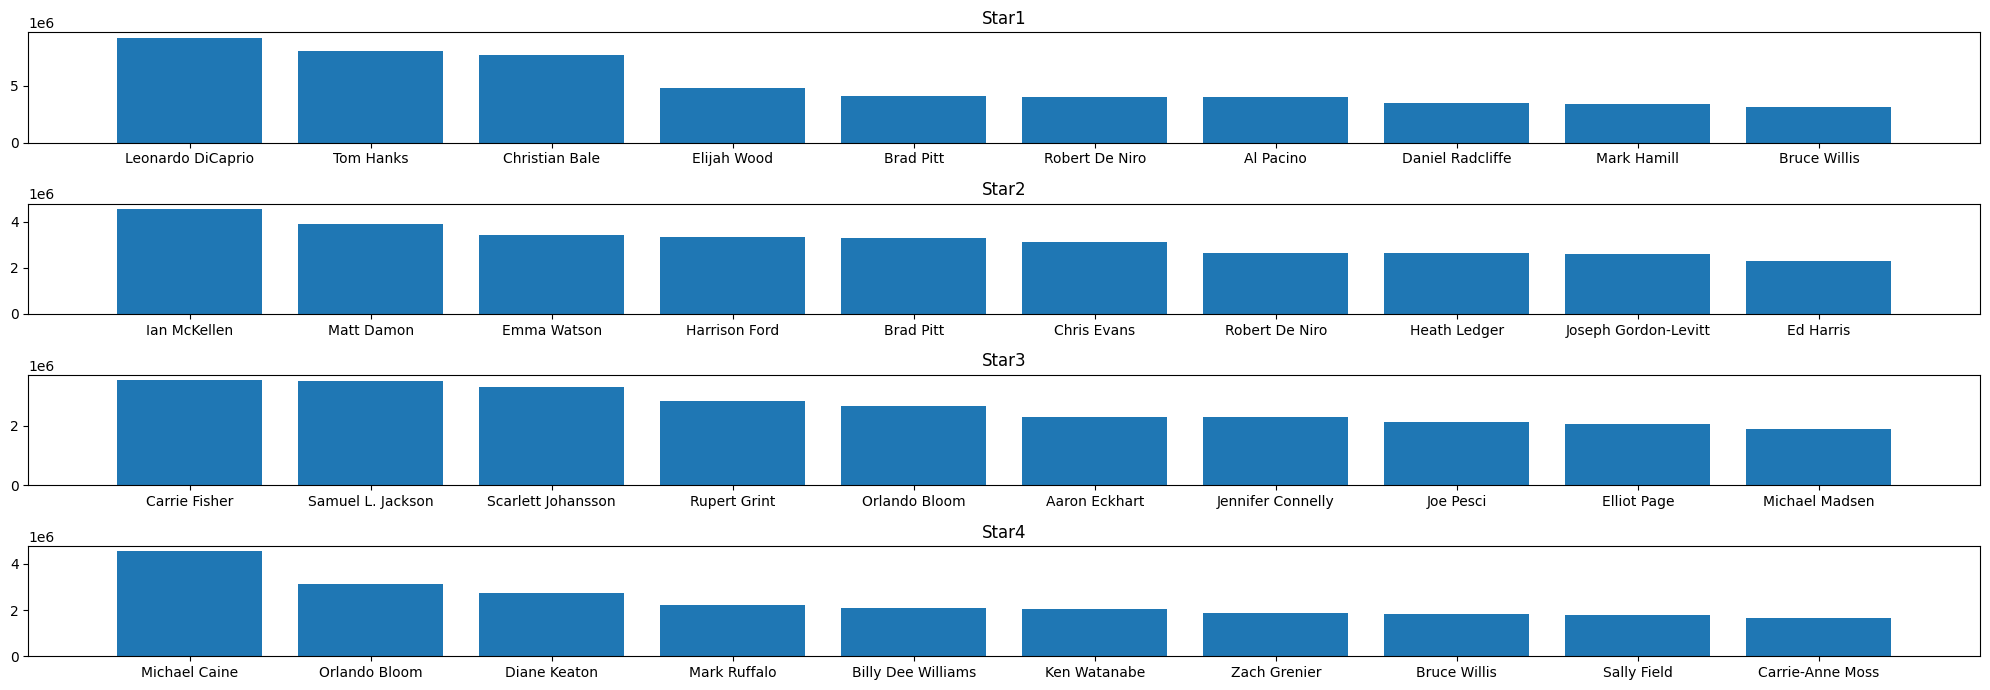

In [156]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    s=raw_df.groupby([x]).sum().reset_index()
    d=s.sort_values(['No_of_Votes'],ascending=False)[:10]
    axs[ax].bar(d[x],d['No_of_Votes'])
    axs[ax].set_title(x)
    ax+=1
    plt.tight_layout()

C:\Users\artur\AppData\Local\Temp\ipykernel_1732\2442636519.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g=sns.distplot(raw_df['IMDB_Rating'],bins=30)


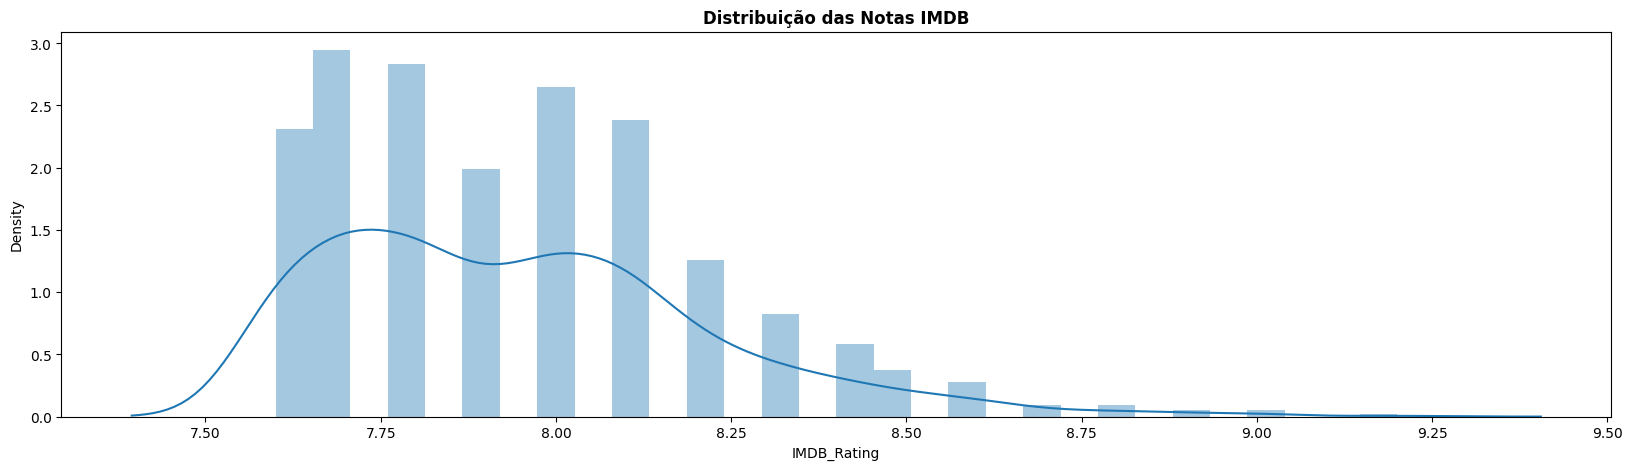

In [157]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.distplot(raw_df['IMDB_Rating'],bins=30)
g.set_title("Distribuição das Notas IMDB", weight = "bold")
plt.show()

### Conclusões

- "The Dark Knight", "Inception", "Fight Club", "Pulp Fiction", "Forrest Gump", "The Matrix" e "The Lord of the Rings: The Fellowship of the Ring" são filmes aclamados pelo público e pela crítica.
- Grandes atores conhecidos pelas suas performances aparecem mais em filmes mais votados.
- A grande maioria dos filmes tem notas entre 7.5 e 8.0.
- Os filmes com maior arrecadação, não são os filmes com a maior nota.

### Limpeza restante dos dados

In [158]:
raw_df.isnull().sum()

Series_Title       0
Released_Year      1
Certificate      103
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Deletando os valores nulos, por serem poucas ocorrências.

In [159]:
raw_df = raw_df[~pd.isnull(raw_df["Released_Year"])].copy()

In [160]:
raw_df = raw_df.loc[~pd.isnull(raw_df["Gross"])].copy()

In [161]:
raw_df = raw_df.loc[~pd.isnull(raw_df["Meta_score"])].copy()

In [162]:
raw_df.loc[pd.isnull(raw_df["Certificate"]),"Certificate"] = raw_df["Certificate"].mode().values[0]

A receita bruta foi convertida para uma escala logarítmica para minimizar o impacto dos valores discrepantes nos dados. Embora os outliers ainda existam, os modelos que serão criados são robustos à presença de outliers, então nenhuma análise adicional será realizada.

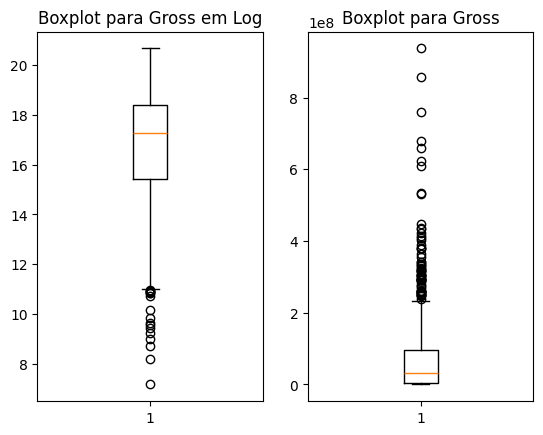

In [163]:
raw_df["Gross_Log"] = np.log(raw_df["Gross"])
raw_df["Gross_Log"]
plt.subplot(1,2,1)
plt.title("Boxplot para Gross em Log")
plt.boxplot(raw_df[~np.isnan(raw_df["Gross_Log"])]["Gross_Log"])
plt.subplot(1,2,2)
plt.title("Boxplot para Gross")
plt.boxplot(raw_df[~np.isnan(raw_df["Gross"])]["Gross"])
plt.show()

In [164]:
Q3 = raw_df["Gross_Log"].quantile(0.75)
Q1 = raw_df["Gross_Log"].quantile(0.25)
IQR = Q3-Q1

raw_df["Released_Decade"] = (10*(raw_df.Released_Year//10))
outliers_df = raw_df.loc[raw_df["Gross_Log"]<= (Q1-IQR*1.5),["Released_Decade","IMDB_Rating","Gross_Log"]]
outliers_df["IMDB_Rating"] = outliers_df["IMDB_Rating"].astype("int")

### Seleção de Features

<Axes: >

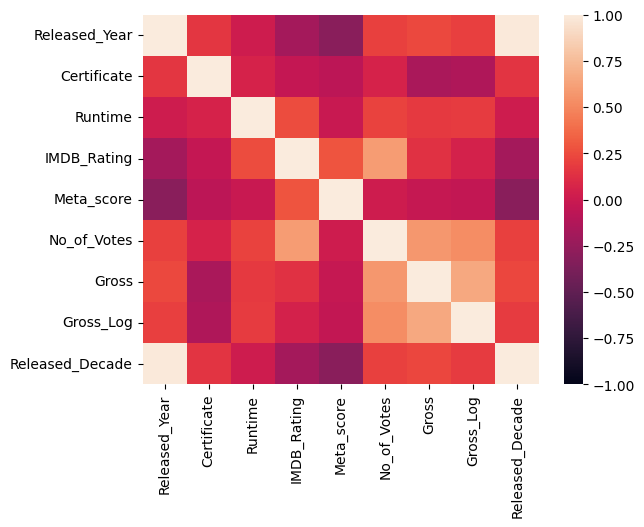

In [165]:
correlation_df = raw_df.corr(numeric_only = True)
sns.heatmap(correlation_df, vmin =-1, vmax=1)

In [166]:
correlation_df

,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Gross_Log,Released_Decade
Released_Year,1.000000,0.159270,0.013033,-0.181447,-0.306415,0.208311,0.235948,0.197006,0.989308
Certificate,0.159270,1.000000,0.060646,-0.035471,-0.077905,0.057902,-0.158345,-0.137279,0.154914
Runtime,0.013033,0.060646,1.000000,0.256602,-0.012383,0.216808,0.172700,0.186433,0.015280
IMDB_Rating,-0.181447,-0.035471,0.256602,1.000000,0.285910,0.600363,0.133999,0.053869,-0.183221
Meta_score,-0.306415,-0.077905,-0.012383,0.285910,1.000000,0.008946,-0.030452,-0.046150,-0.311283
No_of_Votes,0.208311,0.057902,0.216808,0.600363,0.008946,1.000000,0.571753,0.526733,0.210152
Gross,0.235948,-0.158345,0.172700,0.133999,-0.030452,0.571753,1.000000,0.651473,0.228983
Gross_Log,0.197006,-0.137279,0.186433,0.053869,-0.046150,0.526733,0.651473,1.000000,0.185360
Released_Decade,0.989308,0.154914,0.015280,-0.183221,-0.311283,0.210152,0.228983,0.185360,1.000000


<Axes: >

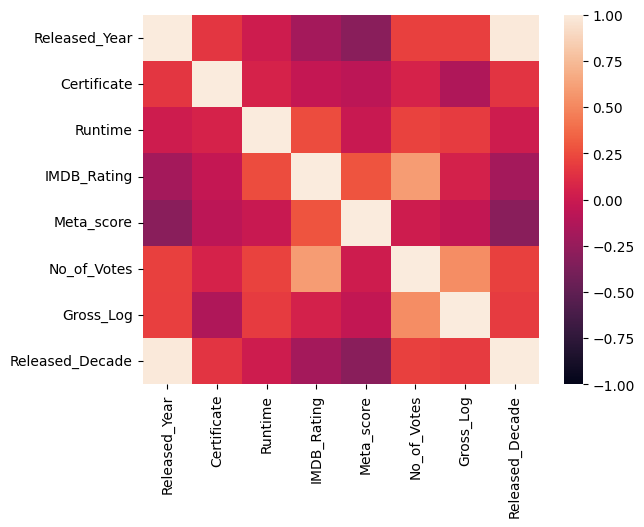

In [167]:
correlation_df = raw_df.drop(["Gross"], axis=1).corr(numeric_only = True)
sns.heatmap(correlation_df, vmin =-1, vmax=1)

In [168]:
correlation_df

,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross_Log,Released_Decade
Released_Year,1.000000,0.159270,0.013033,-0.181447,-0.306415,0.208311,0.197006,0.989308
Certificate,0.159270,1.000000,0.060646,-0.035471,-0.077905,0.057902,-0.137279,0.154914
Runtime,0.013033,0.060646,1.000000,0.256602,-0.012383,0.216808,0.186433,0.015280
IMDB_Rating,-0.181447,-0.035471,0.256602,1.000000,0.285910,0.600363,0.053869,-0.183221
Meta_score,-0.306415,-0.077905,-0.012383,0.285910,1.000000,0.008946,-0.046150,-0.311283
No_of_Votes,0.208311,0.057902,0.216808,0.600363,0.008946,1.000000,0.526733,0.210152
Gross_Log,0.197006,-0.137279,0.186433,0.053869,-0.046150,0.526733,1.000000,0.185360
Released_Decade,0.989308,0.154914,0.015280,-0.183221,-0.311283,0.210152,0.185360,1.000000


Para a análise de correlações, consideramos um limite de |0,70| como aceitável. Quando esse limite é ultrapassado, as variáveis serão analisadas para eliminar essa correlação e evitar multicolinearidade.

Com base nessa regra, a única variável a ser excluída será "Gross", já que "Gross_Log" é uma transformação dessa característica.

In [169]:
processed_df = raw_df.drop(["Gross"], axis=1).copy() 
processed_df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross_Log,Released_Decade
0,The Godfather,1972.0,3.0,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,18.720536,1970.0
1,The Dark Knight,2008.0,2.0,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,20.097513,2000.0
2,The Godfather: Part II,1974.0,3.0,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,17.863811,1970.0
3,12 Angry Men,1957.0,1.0,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,15.287983,1950.0
4,The Lord of the Rings: The Return of the King,2003.0,1.0,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,19.749997,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Giù la testa,1971.0,1.0,157,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,13.454096,1970.0
990,Kelly's Heroes,1970.0,1.0,144,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,14.136459,1970.0
991,The Jungle Book,1967.0,1.0,78,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,18.770236,1960.0
993,A Hard Day's Night,1964.0,1.0,87,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,16.438731,1960.0


Para a geração de variáveis dummy, vou manter apenas o primeiro gênero atribuído para cada filme.

In [170]:
processed_df["Genre"] = processed_df.apply(lambda row: row["Genre"].split(",")[0], axis=1)

Criando uma variável "Nível do Diretor" para categorizar os diretores com base na média do Meta_score de seus filmes. Serão criados 4 grupos, onde 1 representa o melhor e 4 o pior.

In [171]:
directors = raw_df.groupby("Director")["Meta_score"].mean().to_frame()
directors = pd.qcut(directors["Meta_score"], q=4, labels=[4,3,2,1]).to_frame()

processed_df["Director"] = processed_df["Director"].map(directors["Meta_score"])
processed_df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross_Log,Released_Decade
0,The Godfather,1972.0,3.0,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,1,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,18.720536,1970.0
1,The Dark Knight,2008.0,2.0,152,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,3,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,20.097513,2000.0
2,The Godfather: Part II,1974.0,3.0,202,Crime,9.0,The early life and career of Vito Corleone in ...,90.0,1,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,17.863811,1970.0
3,12 Angry Men,1957.0,1.0,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,96.0,1,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,15.287983,1950.0
4,The Lord of the Rings: The Return of the King,2003.0,1.0,201,Action,8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,2,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,19.749997,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Giù la testa,1971.0,1.0,157,Drama,7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,3,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,13.454096,1970.0
990,Kelly's Heroes,1970.0,1.0,144,Adventure,7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,4,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,14.136459,1970.0
991,The Jungle Book,1967.0,1.0,78,Animation,7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,4,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,18.770236,1960.0
993,A Hard Day's Night,1964.0,1.0,87,Comedy,7.6,"Over two ""typical"" days in the life of The Bea...",96.0,1,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,16.438731,1960.0


Realizando uma abordagem semelhante para as estrelas de cinema. A principal diferença neste caso é que primeiro criarei uma lista de atores únicos e depois aplicarei a média de suas pontuações no Meta_score.

In [172]:
full_list = pd.concat([processed_df['Star1'], processed_df['Star2'],
                         processed_df['Star3'],  processed_df['Star4']])

full_list = full_list.unique().tolist()

full_list = pd.DataFrame(columns= ["Actor"], data=full_list)

for i, c in full_list.iterrows(): 
    full_list.loc[i,"Score"] = raw_df[(raw_df["Star1"] == full_list.loc[i,"Actor"] )|
                                      (raw_df["Star2"] == full_list.loc[i,"Actor"] )|
                                      (raw_df["Star3"] == full_list.loc[i,"Actor"] )|
                                      (raw_df["Star4"] == full_list.loc[i,"Actor"] )]["Meta_score"].mean()

full_list["Ranking"] = pd.qcut(full_list["Score"], q=4, labels=[4,3,2,1])

full_list.set_index("Actor", inplace=True)

processed_df["Star1"] = processed_df["Star1"].map(full_list["Ranking"])
processed_df["Star2"] = processed_df["Star2"].map(full_list["Ranking"])
processed_df["Star3"] = processed_df["Star3"].map(full_list["Ranking"])
processed_df["Star4"] = processed_df["Star4"].map(full_list["Ranking"])

processed_df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross_Log,Released_Decade
0,The Godfather,1972.0,3.0,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,1,1,2,1,2,1620367,18.720536,1970.0
1,The Dark Knight,2008.0,2.0,152,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,3,3,2,2,3,2303232,20.097513,2000.0
2,The Godfather: Part II,1974.0,3.0,202,Crime,9.0,The early life and career of Vito Corleone in ...,90.0,1,2,2,2,2,1129952,17.863811,1970.0
3,12 Angry Men,1957.0,1.0,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,96.0,1,2,1,1,1,689845,15.287983,1950.0
4,The Lord of the Rings: The Return of the King,2003.0,1.0,201,Action,8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,2,1,2,3,2,1642758,19.749997,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Giù la testa,1971.0,1.0,157,Drama,7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,3,3,2,3,3,30144,13.454096,1970.0
990,Kelly's Heroes,1970.0,1.0,144,Adventure,7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,4,3,4,3,4,45338,14.136459,1970.0
991,The Jungle Book,1967.0,1.0,78,Animation,7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,4,4,4,4,4,166409,18.770236,1960.0
993,A Hard Day's Night,1964.0,1.0,87,Comedy,7.6,"Over two ""typical"" days in the life of The Bea...",96.0,1,1,1,1,1,40351,16.438731,1960.0


In [173]:
obj=['Genre']
dummy_vars = pd.get_dummies(processed_df[obj],drop_first=True)

dummy_vars.head(5)

,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Drama,Genre_Family,Genre_Film-Noir,Genre_Horror,Genre_Mystery,Genre_Thriller,Genre_Western
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [174]:
processed_final = pd.concat([processed_df[["Runtime","IMDB_Rating","Certificate",
 "Released_Year","Director","Star1","Star2","Star3","Star4","No_of_Votes","Meta_score","Gross_Log"]], 
                             dummy_vars], axis=1)
processed_final

,Runtime,IMDB_Rating,Certificate,Released_Year,Director,Star1,Star2,Star3,Star4,No_of_Votes,...,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Drama,Genre_Family,Genre_Film-Noir,Genre_Horror,Genre_Mystery,Genre_Thriller,Genre_Western
0,175,9.2,3.0,1972.0,1,1,2,1,2,1620367,...,False,False,True,False,False,False,False,False,False,False
1,152,9.0,2.0,2008.0,3,3,2,2,3,2303232,...,False,False,False,False,False,False,False,False,False,False
2,202,9.0,3.0,1974.0,1,2,2,2,2,1129952,...,False,False,True,False,False,False,False,False,False,False
3,96,9.0,1.0,1957.0,1,2,1,1,1,689845,...,False,False,True,False,False,False,False,False,False,False
4,201,8.9,1.0,2003.0,2,1,2,3,2,1642758,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,157,7.6,1.0,1971.0,3,3,2,3,3,30144,...,False,False,False,True,False,False,False,False,False,False
990,144,7.6,1.0,1970.0,4,3,4,3,4,45338,...,False,False,False,False,False,False,False,False,False,False
991,78,7.6,1.0,1967.0,4,4,4,4,4,166409,...,False,False,False,False,False,False,False,False,False,False
993,87,7.6,1.0,1964.0,1,1,1,1,1,40351,...,False,True,False,False,False,False,False,False,False,False


In [175]:
processed_final["Star1"] = processed_final["Star1"].astype("int")
processed_final["Star2"] = processed_final["Star2"].astype("int")
processed_final["Star3"] = processed_final["Star3"].astype("int")
processed_final["Star4"] = processed_final["Star4"].astype("int")
processed_final["Director"] = processed_final["Director"].astype("int")

Verificando novas correlações após a criação das novas variáveis.

In [176]:
corr = processed_final.corr()
corr[(corr>0.7)&(corr!=1)].any(axis=1)

Runtime            False
IMDB_Rating        False
Certificate        False
Released_Year      False
Director            True
Star1               True
Star2               True
Star3               True
Star4               True
No_of_Votes        False
Meta_score         False
Gross_Log          False
Genre_Adventure    False
Genre_Animation    False
Genre_Biography    False
Genre_Comedy       False
Genre_Crime        False
Genre_Drama        False
Genre_Family       False
Genre_Film-Noir    False
Genre_Horror       False
Genre_Mystery      False
Genre_Thriller     False
Genre_Western      False
dtype: bool

Dado o que foi mencionado anteriormente, vou consolidar as variáveis "Stars" e "Director" em uma única variável que calcula o modo da equipe para atribuir uma classe de elenco ("Cast_class").

In [177]:
processed_final["Cast_class"] = processed_final.\
    apply(lambda row: pd.Series([\
        row["Star1"],
        row["Star2"],
        row["Star3"], 
        row["Star4"],
        row["Director"]]).mode().values[0]\
            , axis=1)

processed_final.drop(["Star1", "Star2","Star3","Star4", "Director"], axis=1, inplace= True)

corr = processed_final.corr()
corr[(corr>0.7)&(corr!=1)].any(axis=1)

Runtime            False
IMDB_Rating        False
Certificate        False
Released_Year      False
No_of_Votes        False
Meta_score         False
Gross_Log          False
Genre_Adventure    False
Genre_Animation    False
Genre_Biography    False
Genre_Comedy       False
Genre_Crime        False
Genre_Drama        False
Genre_Family       False
Genre_Film-Noir    False
Genre_Horror       False
Genre_Mystery      False
Genre_Thriller     False
Genre_Western      False
Cast_class         False
dtype: bool

In [178]:
processed_final.head()

,Runtime,IMDB_Rating,Certificate,Released_Year,No_of_Votes,Meta_score,Gross_Log,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Drama,Genre_Family,Genre_Film-Noir,Genre_Horror,Genre_Mystery,Genre_Thriller,Genre_Western,Cast_class
0,175,9.2,3.0,1972.0,1620367,100.0,18.720536,False,False,False,False,True,False,False,False,False,False,False,False,1
1,152,9.0,2.0,2008.0,2303232,84.0,20.097513,False,False,False,False,False,False,False,False,False,False,False,False,3
2,202,9.0,3.0,1974.0,1129952,90.0,17.863811,False,False,False,False,True,False,False,False,False,False,False,False,2
3,96,9.0,1.0,1957.0,689845,96.0,15.287983,False,False,False,False,True,False,False,False,False,False,False,False,1
4,201,8.9,1.0,2003.0,1642758,94.0,19.749997,False,False,False,False,False,False,False,False,False,False,False,False,2


### Treinamento e Validação dos Modelos

In [179]:
processed_final = processed_final[~processed_final.isnull().any(axis=1)].copy()
cols_to_std = ['Runtime','Meta_score', "Released_Year"]
scaler=StandardScaler()
scaler.fit(processed_final[cols_to_std])
processed_final[cols_to_std] = scaler.transform(processed_final[cols_to_std])

X_train, X_test, y_train, y_test = train_test_split(processed_final.loc[:,["Runtime"]+list(processed_final.columns[2:])], 
                                                     processed_final.iloc[:,1], 
                                                     random_state=42, test_size=0.3 )

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(523, 19) (523,)
(225, 19) (225,)


In [180]:
random_forest = RandomForestRegressor(n_estimators=1050)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)

mae = mean_absolute_error(y_test.values.ravel(), Y_pred)
mse_train = "{:.2f}".format(mean_squared_error(y_train.values.ravel(), random_forest.predict(X_train)))
mse_test = "{:.2f}".format(mean_squared_error(y_test.values.ravel(), Y_pred))
r2 = r2_score(y_test.values.ravel(), Y_pred)
score_train = format(random_forest.score(X_train, y_train),'.2%')
score_test = format(random_forest.score(X_test, y_test),'.2%')

print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', mse_test)
print('R-squared:', round(r2, 2))
print('Train score: ', score_train)
print('Test score: ', format(random_forest.score(X_test, y_test.values.ravel()),'.2%'))

models_overview = pd.DataFrame([["Random Forest", score_train, score_test, mse_train, mse_test]],
    columns=["Model","Train Score","Test Score","MSE Train", "MSE Test"])

Mean Absolute Error: 0.15
Mean Squared Error: 0.03
R-squared: 0.59
Train score:  94.32%
Test score:  58.64%


In [181]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
Y_pred = xgb_model.predict(X_test)
score_train = xgb_model.score(X_train, y_train)
score_train = "{:.2f}%".format(score_train*100)
print('Training Score:', score_train)
score_test = xgb_model.score(X_test, y_test)
score_test = "{:.2f}%".format(score_test*100)
print('Testing Score:',  score_test)
output = pd.DataFrame({'Predicted':Y_pred})

mse_train = "{:.2f}".format(mean_squared_error(y_train, xgb_model.predict(X_train)))
mse_test = "{:.2f}".format(mean_squared_error(y_test, xgb_model.predict(X_test)))

models_overview.loc[len(models_overview),:] = ["XGBoost", score_train, score_test, mse_train, mse_test]

Training Score: 99.99%
Testing Score: 52.33%


In [182]:
models_overview

,Model,Train Score,Test Score,MSE Train,MSE Test
0,Random Forest,94.32%,58.64%,0.00,0.03
1,XGBoost,99.99%,52.33%,0.00,0.04


### Prevendo um dado externo

Com a entrada da entrega 4, com as devidas mudanças elaboradas no projeto, qual será a nota gerada?

In [183]:
data = {
'Runtime': 142,
'Certificate': 3.0,
'Released_Year': 1994.0,
'No_of_Votes': 2343110,
'Meta_score': 80.0,
'Gross_Log': 17.159837,
'Genre_Adventure': 0,
'Genre_Animation': 0,
'Genre_Biography': 0,
'Genre_Comedy': 0,
'Genre_Crime': 0,
'Genre_Drama': 1,
'Genre_Family': 0,
'Genre_Film-Noir': 0,
'Genre_Horror': 0,
'Genre_Mystery': 0,
'Genre_Thriller': 0,
'Genre_Western': 0,
'Cast_class': 2.0,
}

In [184]:
pred = pd.DataFrame([data])

In [185]:
prediction = random_forest.predict(pred)

print(f'Previsão: {prediction[0]}')

Previsão: 8.84552380952375


### Salvando o modelo em PKL

In [186]:
joblib.dump(random_forest, 'random_forest_model.pkl')

['random_forest_model.pkl']